Company ticker: AAPL


2023-09-30    1.72
2022-09-30    1.75
2021-09-30    1.47
2020-09-30    0.74
2019-09-30    0.56
Name: ROE, dtype: float64

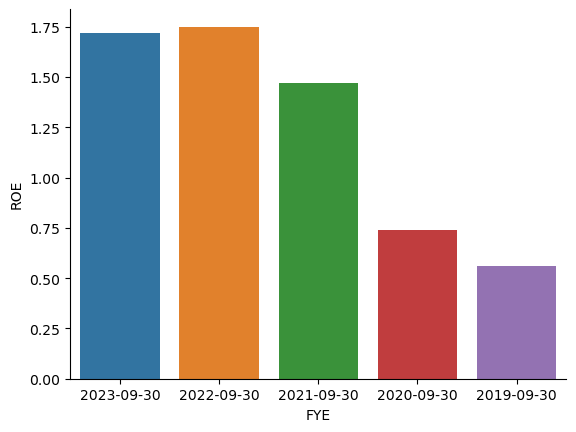

In [2]:
from api_token_file import api_token

import requests
import pandas as pd
import json
import seaborn as sb
import matplotlib.pyplot as plt

tickers_list = ['AAPL']

for ticker in tickers_list: 
    
    print(f'Company ticker: {ticker}')
    fundamental_data_url = f'https://eodhd.com/api/fundamentals/{ticker}?api_token={api_token}&fmt=json'
    fundamental_data_json = requests.get(fundamental_data_url).json()
    
    is_yearly_df = pd.DataFrame.from_dict(fundamental_data_json['Financials']['Income_Statement']['yearly'])
    bs_yearly_df = pd.DataFrame.from_dict(fundamental_data_json['Financials']['Balance_Sheet']['yearly'])
 
    is_yearly_ni_series = is_yearly_df.loc['netIncome']
    is_yearly_ni_series = is_yearly_ni_series.head(5)
    is_yearly_ni_series = pd.to_numeric(is_yearly_ni_series)
    # display(is_yearly_ni_series)

    bs_yearly_equity_series = bs_yearly_df.loc['totalStockholderEquity']
    bs_yearly_equity_series = bs_yearly_equity_series.head(6)
    bs_yearly_equity_series = pd.to_numeric(bs_yearly_equity_series)
    # display(bs_yearly_equity_series)

    bs_yearly_equity_series_2Y_avg = bs_yearly_equity_series.rolling(2).mean().shift(-1)
    bs_yearly_equity_series_2Y_avg = bs_yearly_equity_series_2Y_avg.rename('avgStockholderEquity')
    bs_yearly_equity_series_2Y_avg = bs_yearly_equity_series_2Y_avg.head(5)
    # display(bs_yearly_equity_series_2Y_avg)

    ROE_df = pd.concat([is_yearly_ni_series, bs_yearly_equity_series_2Y_avg], axis=1)
    ROE_df['FYE'] = ROE_df.index
    ROE_df['ROE'] = ROE_df['netIncome']/ROE_df['avgStockholderEquity']
    ROE_df['ROE'] = ROE_df['ROE'].round(2)

    display(ROE_df['ROE'])

    plt.figure()
    # plt.xticks(rotation=270)
    sb.barplot(y=ROE_df['ROE'], x=ROE_df['FYE'], errorbar=None)
    sb.despine()
    plt.savefig(f'{ticker}.png')